In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_excel(r"C:\Users\LENOVO\Desktop\sample.xlsx")
df.head()

,BHK,AREA_SQFT,FURNISHING_STATUS,LANDMARK,PARKING,GAS_PIPELINE,WATER_SUPPLY,PRICE,Unnamed: 8
0,2.0,1230,FULLY FURNISHED,EARTHCON MEGA COUNTY,YES,YES,YES,27500.0,NaN
1,2.0,1500,FULLY FURNISHED,JAKHAN,YES,NaN,NaN,26000.0,NaN
2,3.0,1750,FULLY FURNISHED,SAHASTRADHARA ROAD,YES,NO,YES,20000.0,NaN
3,3.0,1979,SEMI FURNISHED,EARTHCON MEGA COUNTY,YES,YES,YES,33500.0,NaN
4,2.0,1250,FULLY FURNISHED,CANAL ROAD,YES,YES,NaN,25000.0,NaN


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619 entries, 0 to 618
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                619 non-null    float64
 1   AREA_SQFT          619 non-null    object 
 2   FURNISHING_STATUS  619 non-null    object 
 3   LANDMARK           619 non-null    object 
 4   PARKING            587 non-null    object 
 5   GAS_PIPELINE       516 non-null    object 
 6   WATER_SUPPLY       297 non-null    object 
 7   PRICE              618 non-null    float64
 8   Unnamed: 8         1 non-null      object 
dtypes: float64(2), object(7)
memory usage: 43.7+ KB


BHK                    0
AREA_SQFT              0
FURNISHING_STATUS      0
LANDMARK               0
PARKING               32
GAS_PIPELINE         103
WATER_SUPPLY         322
PRICE                  1
Unnamed: 8           618
dtype: int64

In [3]:
df['PARKING'] = df['PARKING'].fillna(df['PARKING'].mode()[0])
df['GAS_PIPELINE'] = df['GAS_PIPELINE'].fillna(df['GAS_PIPELINE'].mode()[0])
df['WATER_SUPPLY'] = df['WATER_SUPPLY'].fillna(0)
df.head(5)

,BHK,AREA_SQFT,FURNISHING_STATUS,LANDMARK,PARKING,GAS_PIPELINE,WATER_SUPPLY,PRICE,Unnamed: 8
0,2.0,1230,FULLY FURNISHED,EARTHCON MEGA COUNTY,YES,YES,YES,27500.0,NaN
1,2.0,1500,FULLY FURNISHED,JAKHAN,YES,NO,0,26000.0,NaN
2,3.0,1750,FULLY FURNISHED,SAHASTRADHARA ROAD,YES,NO,YES,20000.0,NaN
3,3.0,1979,SEMI FURNISHED,EARTHCON MEGA COUNTY,YES,YES,YES,33500.0,NaN
4,2.0,1250,FULLY FURNISHED,CANAL ROAD,YES,YES,0,25000.0,NaN


In [4]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

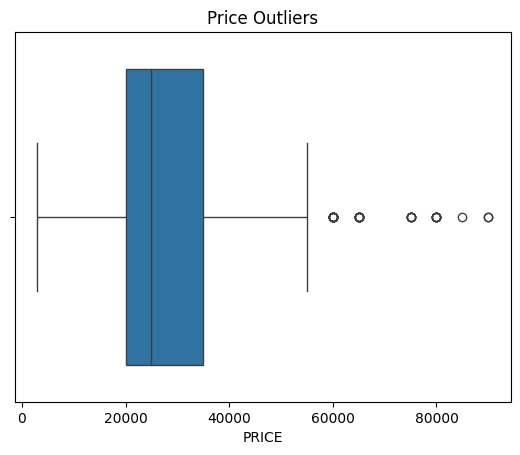

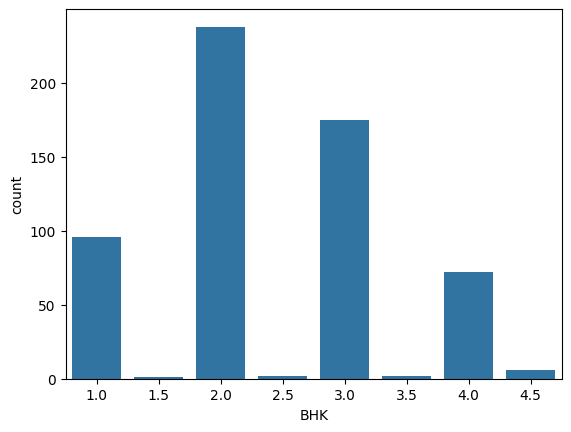

In [5]:
# visual representation

sns.boxplot(x=df['PRICE'])
plt.title("Price Outliers")
plt.show()

# yeh catagorical columns haii
sns.countplot(x=df['BHK'])
plt.show()

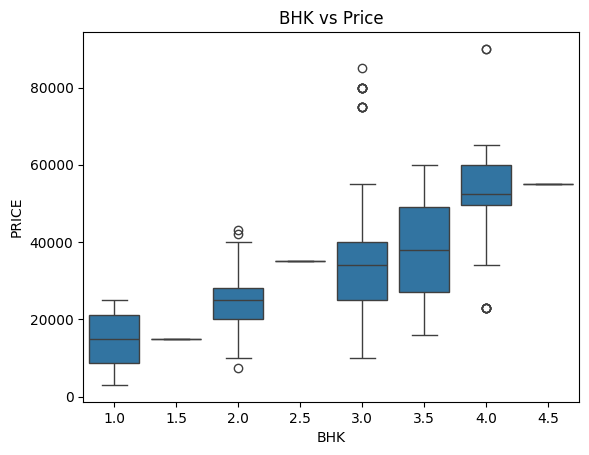

In [6]:
sns.boxplot(x='BHK', y='PRICE', data=df)
plt.title("BHK vs Price")
plt.show()

In [7]:
yes_no_cols = ['PARKING', 'GAS_PIPELINE', 'WATER_SUPPLY']

for col in yes_no_cols:
    df[col] = (
        df[col]
        .astype(str)            
        .str.strip()             
        .str.upper()           
        .replace('0', 'NO')      
        .map({'YES': 1, 'NO': 0})
    )

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['FURNISHING_STATUS'] = encoder.fit_transform(df['FURNISHING_STATUS'])
df = df.drop(columns=['Unnamed: 8'])
df.head()

,BHK,AREA_SQFT,FURNISHING_STATUS,LANDMARK,PARKING,GAS_PIPELINE,WATER_SUPPLY,PRICE
0,2.0,1230,0,EARTHCON MEGA COUNTY,1,1,1,27500.0
1,2.0,1500,0,JAKHAN,1,0,0,26000.0
2,3.0,1750,0,SAHASTRADHARA ROAD,1,0,1,20000.0
3,3.0,1979,1,EARTHCON MEGA COUNTY,1,1,1,33500.0
4,2.0,1250,0,CANAL ROAD,1,1,0,25000.0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['LANDMARK'] = le.fit_transform(df['LANDMARK'])

numeric_columns = ["AREA_SQFT", "PRICE", "BHK"]  

for col in numeric_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('`', '', regex=False)  
        df[col] = df[col].str.replace(',', '', regex=False)              
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:

df['ROOM_AREA_RATIO'] = df['AREA_SQFT'] / df['BHK']
df['BHK_AREA_COMBO'] = df['BHK'] * df['AREA_SQFT']
df['UTILITIES_SUM'] = df['PARKING'] + df['GAS_PIPELINE'] + df['WATER_SUPPLY']
df['LOG_PRICE'] = np.log1p(df['PRICE'])

df_numeric = df.select_dtypes(include=['float64', 'int64'])

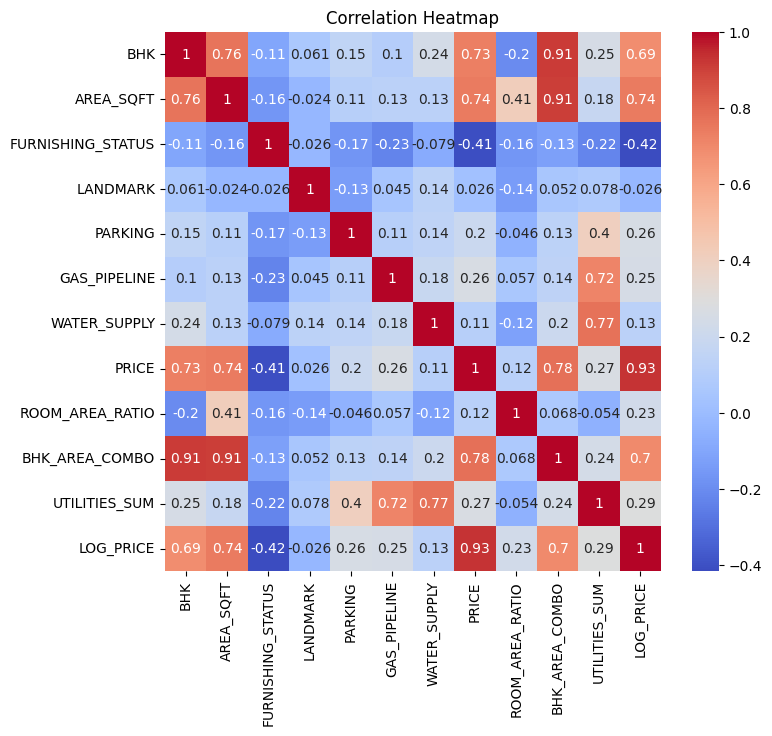

In [12]:
plt.figure(figsize=(8,7))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [13]:
df.head(5)

,BHK,AREA_SQFT,FURNISHING_STATUS,LANDMARK,PARKING,GAS_PIPELINE,WATER_SUPPLY,PRICE,ROOM_AREA_RATIO,BHK_AREA_COMBO,UTILITIES_SUM,LOG_PRICE
0,2.0,1230,0,11,1,1,1,27500.0,615.000000,2460.0,3,10.221978
1,2.0,1500,0,17,1,0,0,26000.0,750.000000,3000.0,1,10.165890
2,3.0,1750,0,37,1,0,1,20000.0,583.333333,5250.0,2,9.903538
3,3.0,1979,1,11,1,1,1,33500.0,659.666667,5937.0,3,10.419331
4,2.0,1250,0,6,1,1,0,25000.0,625.000000,2500.0,2,10.126671


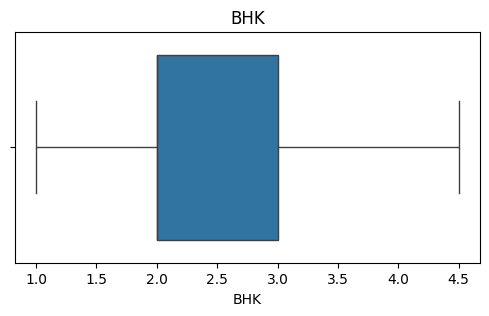

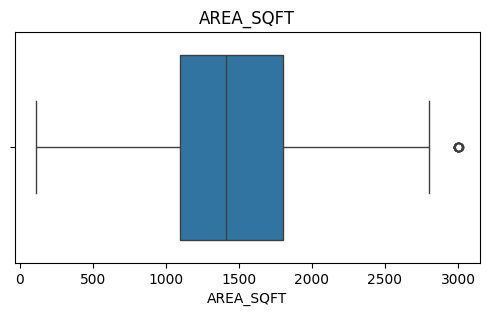

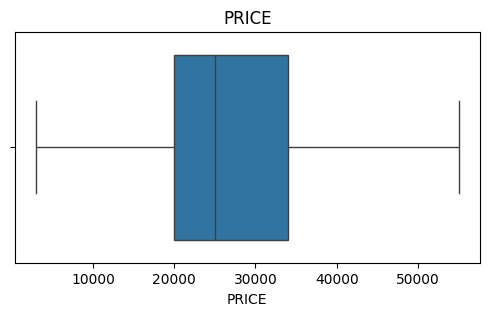

In [14]:
X = df.drop(columns=['PRICE'])
y = df['PRICE']

numerical_cols = ['BHK', 'AREA_SQFT', 'PRICE']
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [15]:
X_unsupervised = df.drop(columns=['PRICE', 'LOG_PRICE'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unsupervised)
df.groupby('Cluster').mean()

,BHK,AREA_SQFT,FURNISHING_STATUS,LANDMARK,PARKING,GAS_PIPELINE,WATER_SUPPLY,PRICE,ROOM_AREA_RATIO,BHK_AREA_COMBO,UTILITIES_SUM,LOG_PRICE
Cluster,,,,,,,,,,,,
0,2.963710,1814.955645,0.459677,22.983871,1.000000,0.483871,0.758065,34447.360324,630.683132,5593.925403,2.241935,10.391123
1,1.802867,1086.297491,0.666667,24.021505,0.935484,0.139785,0.265233,21115.591398,600.017494,2155.283154,1.340502,9.858454
2,1.472222,1966.000000,0.222222,16.444444,0.777778,0.000000,0.166667,24277.777778,1378.166667,3183.333333,0.944444,10.023557


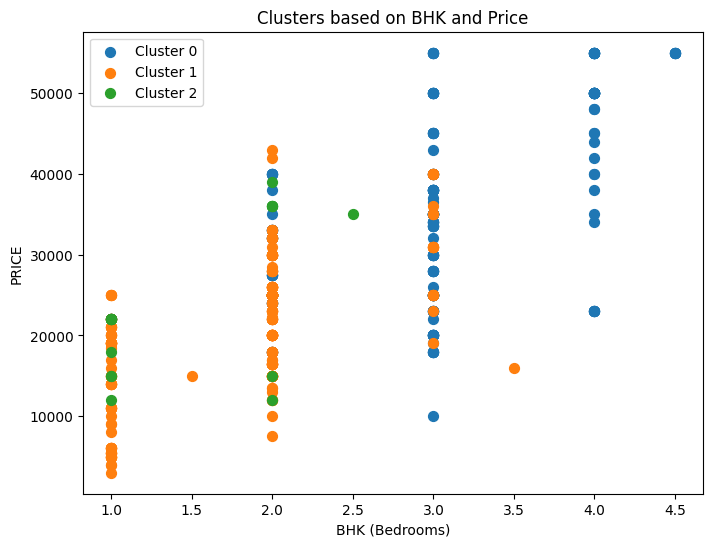

In [16]:
plt.figure(figsize=(8,6))

for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['BHK'], cluster_data['PRICE'], s=50, label=f"Cluster {cluster}")

plt.xlabel("BHK (Bedrooms)")
plt.ylabel("PRICE")
plt.title("Clusters based on BHK and Price")
plt.legend()
plt.show()

In [17]:
y = df['PRICE'].values
target_col = 'PRICE' 

In [18]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=['PRICE', 'LOG_PRICE'])
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




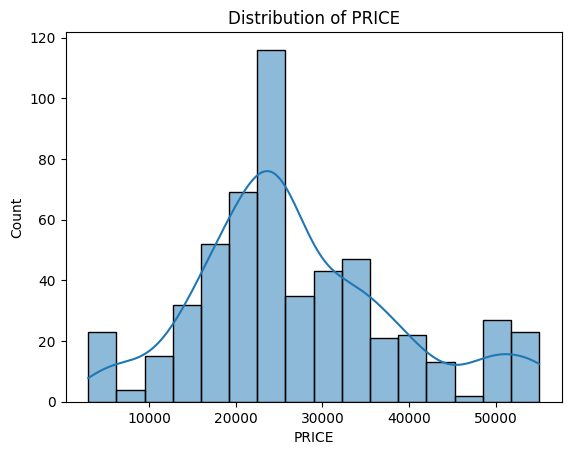

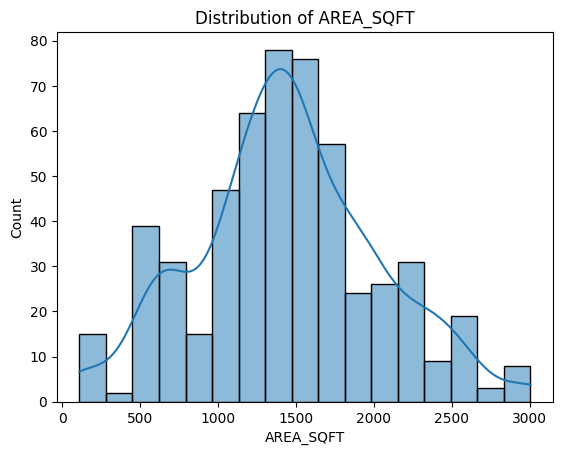

In [19]:
for col in ['PRICE', 'AREA_SQFT']:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

model = XGBRegressor(
    n_estimators=300,        
    learning_rate=0.05,     
    max_depth=7,             
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    reg_lambda=1.0,        
    reg_alpha=0.5
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print("RMSE:", rmse)
print("Train R²:", r2_train)
print("Test R²:", r2_test)


RMSE: 2964.3190957522434
Train R²: 0.9992399436782556
Test R²: 0.9372925144435531


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("Cross-val R²:", scores)
print("Average R²:", scores.mean())

Cross-val R²: [0.74704458 0.77298478 0.9773147  0.96496867 0.94762993]
Average R²: 0.8819885310583381


In [22]:

y_pred = model.predict(X_test[:50])


comparison_df = pd.DataFrame({
    'Actual Price ': y_test[:50].values,
    'Predicted Price ': y_pred
})


comparison_df['Actual Price '] = comparison_df['Actual Price '].apply(lambda x: f"₹{x:,.2f}")
comparison_df['Predicted Price '] = comparison_df['Predicted Price '].apply(lambda x: f"₹{x:,.2f}")

print("\n🏡 Actual vs Predicted House Prices:\n")
print(comparison_df.to_string(index=False))


🏡 Actual vs Predicted House Prices:

Actual Price  Predicted Price 
   ₹15,000.00       ₹14,995.04
   ₹18,000.00       ₹17,963.89
   ₹25,000.00       ₹25,088.59
   ₹36,000.00       ₹35,855.11
   ₹50,000.00       ₹49,973.32
   ₹50,000.00       ₹48,180.07
   ₹42,000.00       ₹24,299.09
   ₹55,000.00       ₹50,149.04
   ₹15,000.00       ₹12,143.92
   ₹25,000.00       ₹24,974.79
    ₹5,000.00        ₹5,008.43
   ₹23,000.00       ₹22,908.23
   ₹40,000.00       ₹40,082.77
   ₹24,000.00       ₹23,918.77
   ₹25,000.00       ₹25,051.30
   ₹38,000.00       ₹38,195.15
   ₹19,000.00       ₹19,032.74
   ₹32,000.00       ₹31,219.30
   ₹28,000.00       ₹27,966.99
   ₹24,000.00       ₹24,674.39
   ₹40,000.00       ₹33,370.93
   ₹33,000.00       ₹32,974.27
    ₹5,500.00        ₹5,466.02
   ₹25,000.00       ₹24,974.79
    ₹6,000.00        ₹5,989.25
   ₹20,000.00       ₹21,292.99
   ₹22,000.00       ₹20,251.69
   ₹25,000.00       ₹25,076.73
   ₹25,000.00       ₹24,991.72
   ₹16,500.00       ₹16,558.28
 

In [23]:
scaler_cluster = StandardScaler()
X_unsupervised = df.drop(columns=['PRICE', 'LOG_PRICE'])
X_cluster_scaled = scaler_cluster.fit_transform(X_unsupervised)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# For regression model
X = df.drop(columns=['PRICE', 'LOG_PRICE'])
y = df['PRICE']
scaler_model = StandardScaler()
X_scaled = scaler_model.fit_transform(X)

In [24]:
print(X.columns.tolist())


['BHK', 'AREA_SQFT', 'FURNISHING_STATUS', 'LANDMARK', 'PARKING', 'GAS_PIPELINE', 'WATER_SUPPLY', 'ROOM_AREA_RATIO', 'BHK_AREA_COMBO', 'UTILITIES_SUM', 'Cluster']


In [25]:
import joblib
joblib.dump(model, 'house_price_model2.pkl')


['house_price_model2.pkl']

In [26]:
import joblib
joblib.dump(X.columns, 'model_columns2.pkl')


['model_columns2.pkl']

In [27]:
joblib.dump(kmeans, 'kmeans2.pkl')

['kmeans2.pkl']

In [28]:
joblib.dump(scaler, 'cluster_scaler2.pkl')

['cluster_scaler2.pkl']